# Iris Classifier

#### In this notebook i will follow a tutorial from [carlosbaia.com](http://carlosbaia.com/2016/12/24/decision-tree-e-random-forest/), where we will classifie which species of iris, based on a dataset found on [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris).

![IRIS SPECIES](iris-flowers.png)

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
names = ['SepalLength', 'SepalWidth', 'PedalLength','PedalWidth','Class']
dataset = pd.read_csv('iris.data', names=names)

### Data Exploration

In [3]:
print("Linhas: %d, Colunas: %d" % (len(dataset), len(dataset.columns)))
dataset.head()

Linhas: 150, Colunas: 5


,SepalLength,SepalWidth,PedalLength,PedalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataplot = dataset.iloc[:,4].value_counts()
dataplot

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

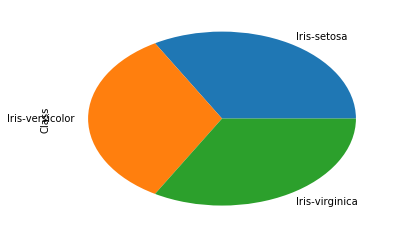

In [5]:
%matplotlib inline
dataplot.plot(kind = 'pie')

Class
Iris-setosa        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-versicolor    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-virginica     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

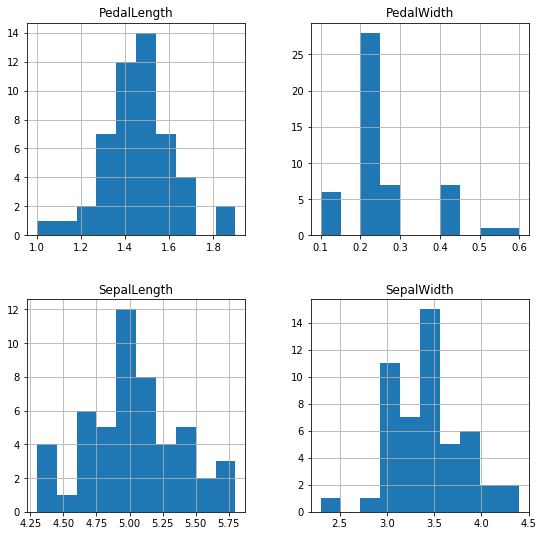

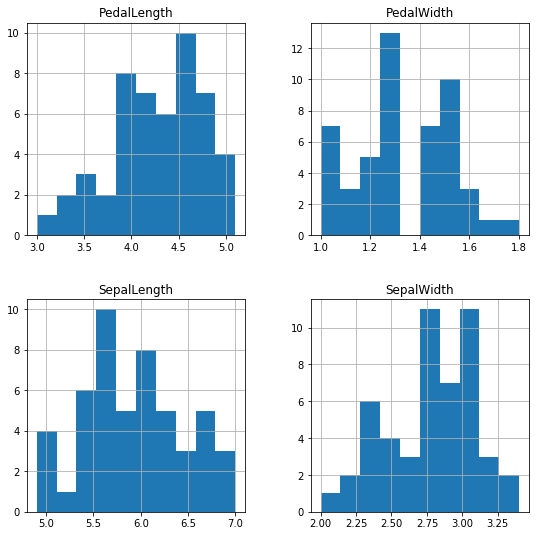

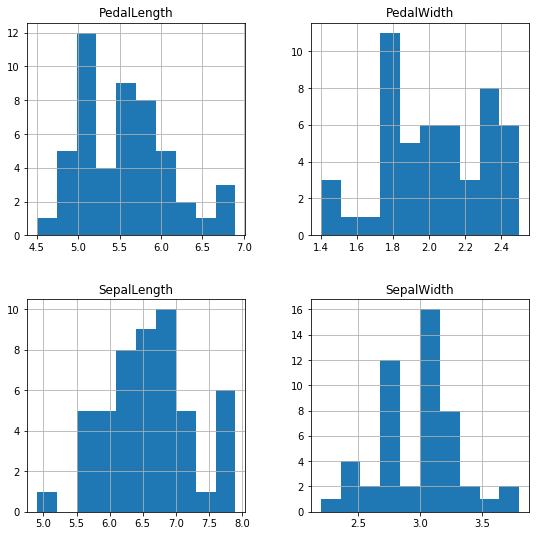

In [6]:
dataset.groupby(dataset.iloc[:,4]).hist(figsize=(9, 9))

### Implementing features

In [8]:
# As we have the width and length, we can create an area feature
dataset['SepalArea'] = dataset['SepalLength'] * dataset['SepalWidth']
dataset['PedalArea'] = dataset['PedalLength'] * dataset['PedalWidth']

In [9]:
# Let's take the mean of each feature and create a boolean feature
# that marks line by line if theses values are above the mean.
dataset['SepalLengthAboveMean'] = dataset['SepalLength'] > dataset['SepalLength'].mean()
dataset['SepalWidthAboveMean'] = dataset['SepalWidth'] > dataset['SepalWidth'].mean()

dataset['PedalLengthAboveMean'] = dataset['PedalLength'] > dataset['PedalLength'].mean()
dataset['PedalWidthAboveMean'] = dataset['PedalWidth'] > dataset['PedalWidth'].mean()
dataset.head()

,SepalLength,SepalWidth,PedalLength,PedalWidth,Class,SepalArea,PedalArea,SepalLengthAboveMean,SepalWidthAboveMean,PedalLengthAboveMean,PedalWidthAboveMean
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28,False,True,False,False
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28,False,False,False,False
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26,False,True,False,False
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30,False,True,False,False
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28,False,True,False,False


### Splitting

In [10]:
features = dataset.columns.difference(['Class'])

X = dataset[features].values
y = dataset['Class'].values

### Samples

#### Before starting let's take some samples to validate our model later on.

In [19]:
# Iris-setosa
sample1 = [1.0, 2.0, 3.5, 1.0, 10.0, 3.5, False, False, False, False]
# Iris-versicolor
sample2 = [5.0, 3.5, 1.3, 0.2, 17.8, 0.2, False, True, False, False]
# Iris-virginica
sample3 = [7.9, 5.0, 2.0, 1.8, 19.7, 9.1, True, False, True, True]

### Training and Testing

In [18]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state=1986, criterion='gini', max_depth=3)
classifier_dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1986,
            splitter='best')

In [20]:
classifier_dt.predict([sample1, sample2, sample3])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Above we have our model trained, but that don't mean that if we try our model with a different set, that it will work. So we will follow an approch using the Cross Validation creating some folds, five to be more specific, and like that we will use 4 for training and one for testing.

In [21]:
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(classifier_dt, X, y, scoring = 'accuracy', cv=5)

print(scores_dt.mean())

0.9533333333333334
